In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the CSV file
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [3]:
# Clean the data
def clean_data(data):
    # Display the initial shape of the data
    print(f"Initial data shape: {data.shape}")

    # Remove duplicates
    data = data.drop_duplicates()
    print(f"Data shape after removing duplicates: {data.shape}")

    # Handle missing values
    # Example: Fill missing numerical values with the mean
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

    # Example: Drop rows with missing categorical values
    for column in data.select_dtypes(include=['object']).columns:
        data[column].dropna(inplace=True)

In [4]:
def save_data(data, output_file_path):
    try:
        data.to_csv(output_file_path, index=False)
        print(f"Cleaned data saved to {output_file_path}")
    except Exception as e:
        print(f"Error saving data: {e}")

In [7]:
input_file_path = "C:/Users/Samsung/Downloads/german_credit_data.csv"  # Change to your input file path
output_file_path = 'cleaned_german_credit_data.csv'  # Change to your desired output file path

# Load the data
data = load_data(input_file_path)
if data is not None:
    # Clean the data
    cleaned_data = clean_data(data)
    # Save the cleaned data
    save_data(cleaned_data, output_file_path)

Data loaded successfully.
Initial data shape: (1000, 11)
Data shape after removing duplicates: (1000, 11)
Error saving data: 'NoneType' object has no attribute 'to_csv'


C:\Users\Samsung\AppData\Local\Temp\ipykernel_14264\3651908042.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mean_value, inplace=True)


In [9]:
# Step 1: Load the CSV file
df = pd.read_csv("C:/Users/Samsung/Downloads/german_credit_data.csv")

# Step 2: Check the data types of each column
data_types = df.dtypes

# Step 3: Print the data types
print(data_types)

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object


In [10]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

C:\Users\Samsung\AppData\Local\Temp\ipykernel_14264\3114103383.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


In [11]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,0,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,1,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,0,1,own,little,NaN,2096,12,education,good
3,3,45,0,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,0,2,free,little,little,4870,24,car,bad


In [14]:
df_cleaned = df.dropna()
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (1000, 11)
Cleaned DataFrame shape: (522, 11)


In [15]:
df_cleaned.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,1,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,0,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,0,2,free,little,little,4870,24,car,bad
7,7,35,0,3,rent,little,moderate,6948,36,car,good
9,9,28,0,3,own,little,moderate,5234,30,car,bad


In [19]:
# Drop the first column (index 0)
df_cleaned = df_cleaned.drop(df.columns[0], axis=1)

# Print the remaining columns to verify
print("Remaining columns after dropping the first column:")
print(df_cleaned.columns)

Remaining columns after dropping the first column:
Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [20]:
for column in df_cleaned.columns:
    print(f"Counts for {column}:")
    print(df[column].value_counts())
    print()  # Print a newline for better readability

Counts for Age:
Age
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: count, dtype: int64

Counts for Sex:
Sex
0    690
1    310
Name: count, dtype: int64

Counts for Job:
Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

Counts for Housing:
Housing
own     713
rent    179
free    108
Name: count, dtype: int64

Counts for Saving accounts:
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

Counts for Checking account:
Checking account
little      274
moderate    269
rich         63


In [31]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Function to plot categorical distributions
# def plot_categorical_distribution(column):
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=df_cleaned, x=column, palette='Set2')
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()

def plot_pie_chart(column):
    # Get the counts of each category
    counts = df_cleaned[column].value_counts()
    
    # Plotting the pie chart
    plt.figure(figsize=(8, 6))
    counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')  # Remove the y-label for better aesthetics
    plt.show()

# Function to plot histogram for numerical variables
def plot_numerical_distribution(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=column, bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


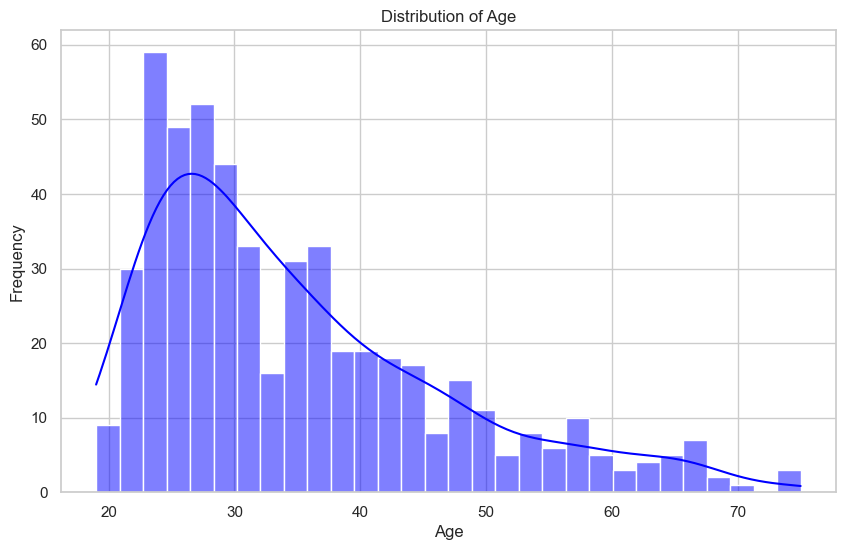

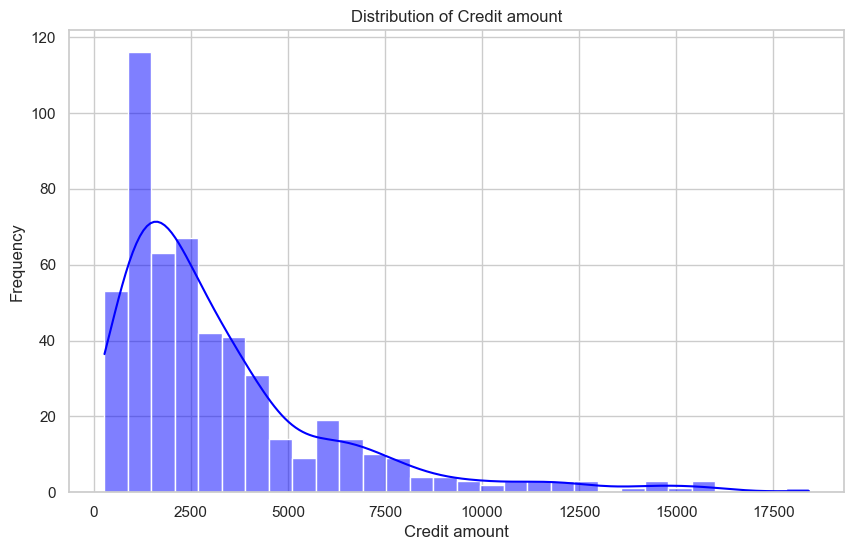

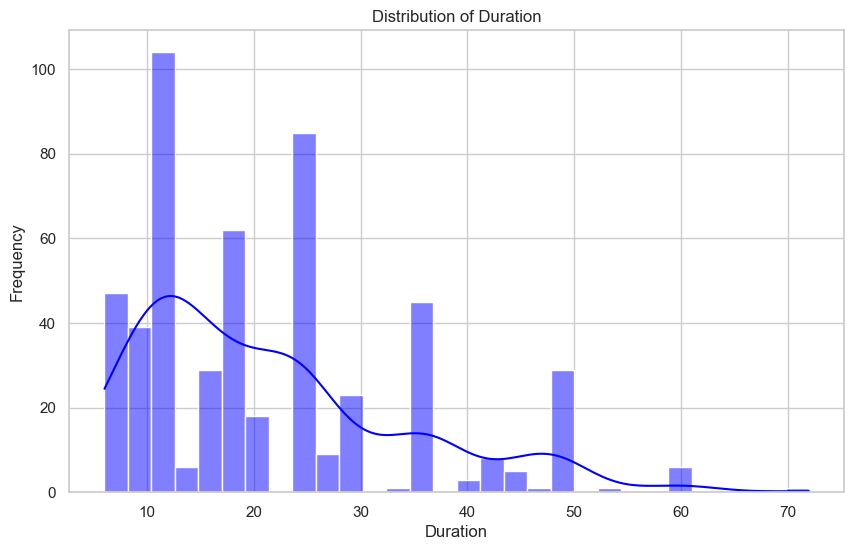

In [30]:
# Plot for numerical columns
plot_numerical_distribution('Age')
plot_numerical_distribution('Credit amount')
plot_numerical_distribution('Duration')

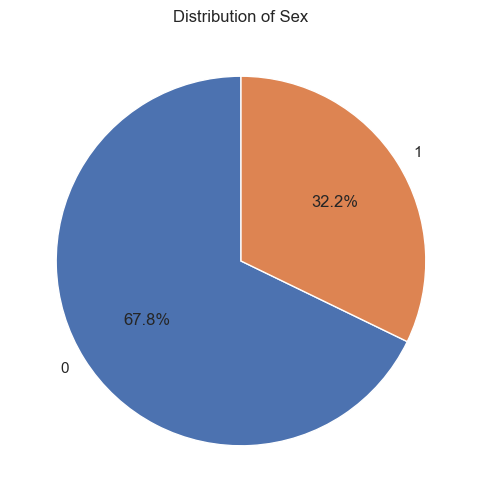

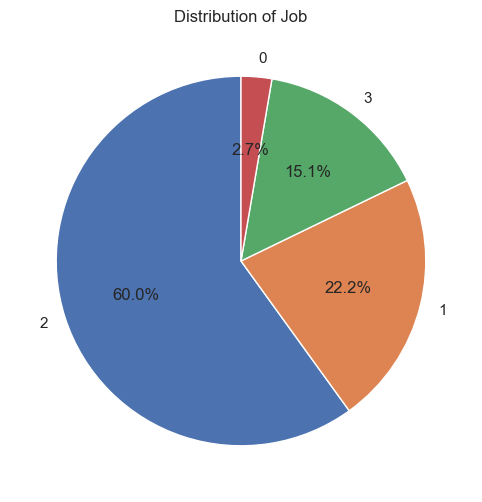

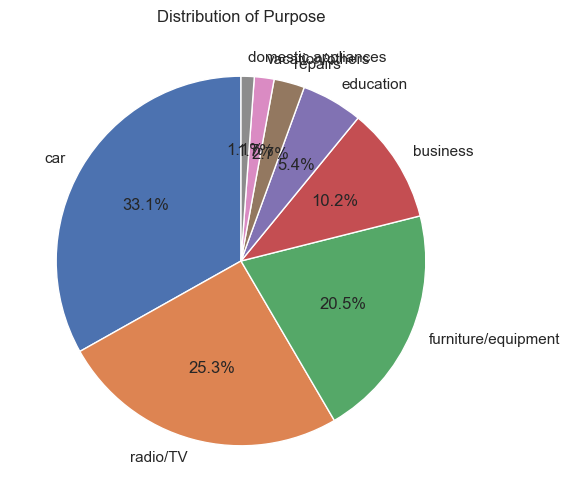

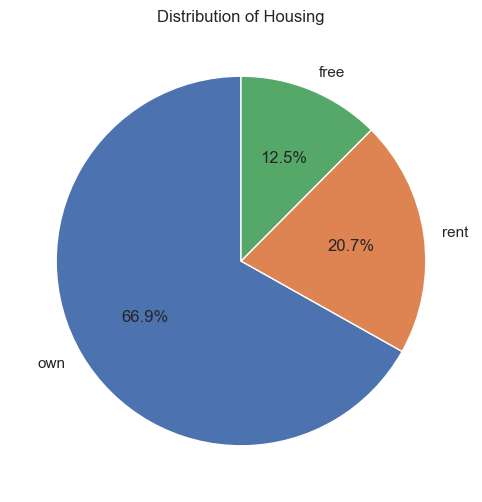

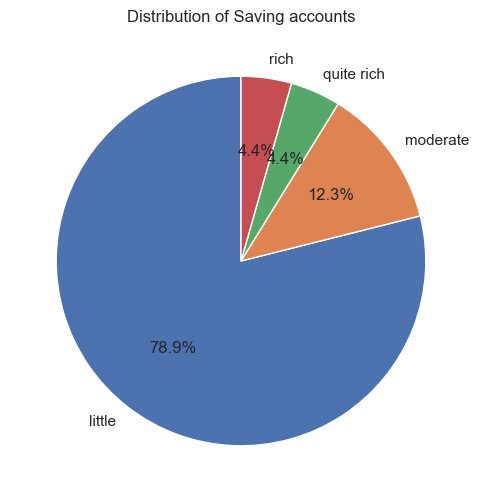

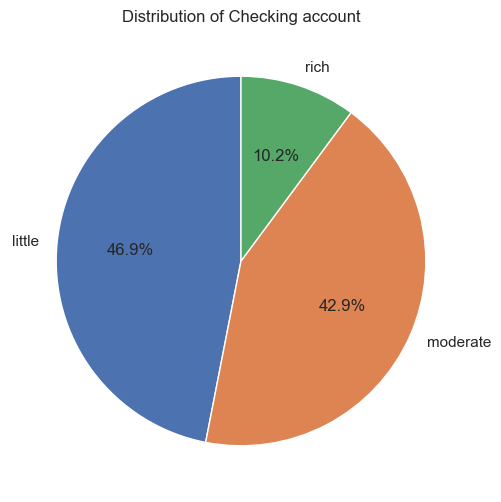

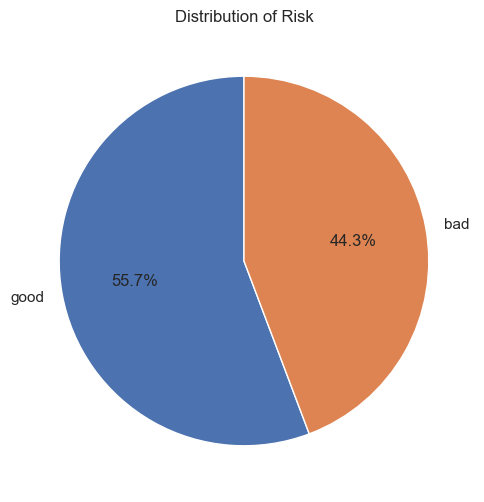

In [29]:
# Plot for categorical columns
plot_pie_chart('Sex')
plot_pie_chart('Job')
plot_pie_chart('Purpose')
plot_pie_chart('Housing')
plot_pie_chart('Saving accounts')
plot_pie_chart('Checking account')
plot_pie_chart('Risk')

In [34]:
# Output df_cleaned to a CSV file
df_cleaned.to_csv('C:/Users/Samsung/Downloads/cleaned_german_credit_data.csv', index=False)